<img src="newlogomioti.png" style="height: 100px">


&nbsp;
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Machine Learning 2 (Unsupervised learning)</center>

# Challenge S2: Aprendizaje no supervisado: PCA

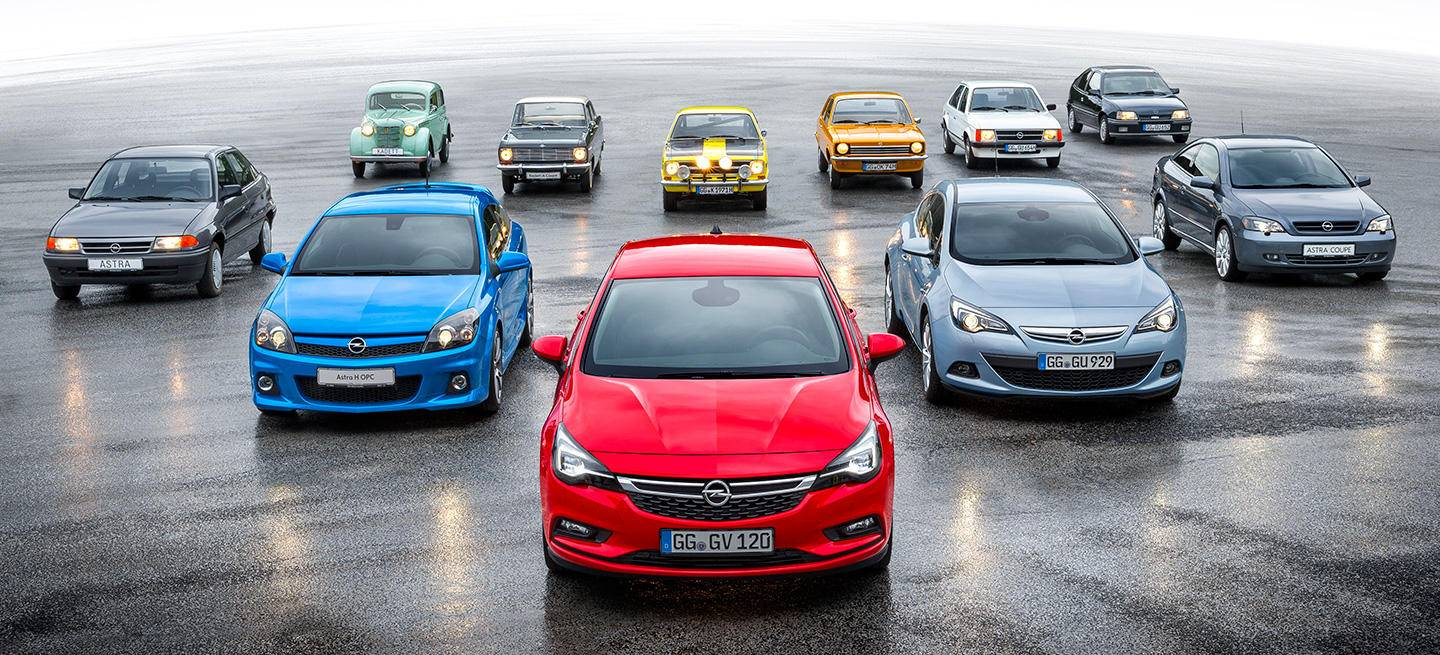

## Objetivos

El objetivo de este challenge es reducir la dimensión de un dataset que dispone de las características de distintos modelos de coches, en especial todoterrenos y turismos.

Para ello, utilizando la técnica de PCA realizaremos una reducción de dimensionalidad de las variables que nos indican las características (tamaño del motor, distancia entre ejes, longitud, anchura, ...) y posteriormente veremos si quedan identificados los todoterrenos y turismos.

### Importando y preparando dataset

In [1]:
#importamos las librerías
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
coche=pd.read_csv('Car_sales.csv')
coche.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales in thousands   157 non-null    float64
 3   4-year resale value  157 non-null    object 
 4   Vehicle type         157 non-null    object 
 5   Price in thousands   157 non-null    object 
 6   Engine size          157 non-null    object 
 7   Horsepower           157 non-null    object 
 8   Wheelbase            157 non-null    object 
 9   Width                157 non-null    object 
 10  Length               157 non-null    object 
 11  Curb weight          157 non-null    object 
 12  Fuel capacity        157 non-null    object 
 13  Fuel efficiency      157 non-null    object 
 14  Latest Launch        157 non-null    object 
dtypes: float64(1), object(14)
memory usage: 

#### Podemos observar que en este dataset los nombres de las variables vienen con espacios, así como observamos que hay datos que vienen como '.' 

In [3]:
coche = coche.rename(columns={'Sales in thousands':'Sales_in_thousands','4-year resale value':'4_year_resale_value','Vehicle type':'Vehicle_type','Price in thousands':'Price_in_thousands','Engine size':'Engine_size','Curb weight':'Curb_weight','Fuel capacity':'Fuel_capacity','Fuel efficiency':'Fuel_efficiency','Latest Launch':'Latest_Launch'})
coche=coche.replace('.','NaN')

#### Vamos a ver ahora la información del dataset

In [4]:
coche.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   4_year_resale_value  157 non-null    object 
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   157 non-null    object 
 6   Engine_size          157 non-null    object 
 7   Horsepower           157 non-null    object 
 8   Wheelbase            157 non-null    object 
 9   Width                157 non-null    object 
 10  Length               157 non-null    object 
 11  Curb_weight          157 non-null    object 
 12  Fuel_capacity        157 non-null    object 
 13  Fuel_efficiency      157 non-null    object 
 14  Latest_Launch        157 non-null    object 
dtypes: float64(1), object(14)
memory usage: 

#### Observamos que varias de nuestras columnas que deberían ser float son realmente object

In [5]:
coche[['4_year_resale_value','Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency']]=coche[['4_year_resale_value','Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency']].astype(float)

#### Vamos ahora a eliminar los duplicados y comprobar cuantos había

In [6]:
coche = coche.drop_duplicates()
coche.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   4_year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
dtypes: float64(11), object(4)
memory usage: 

#### En nuestro dataset no había datos duplicados, continuaremos ahora con los missing data

In [7]:
coche.isna().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
4_year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
dtype: int64

#### Observamos que tenemos 36 missing data en 4_year_resale_value,2 en Price_in_thousands y Curb_weight, 3 en Fuel_efficiency y 1 en Engine_size,Horsepower, Wheelbase, Width,Length,y Fuel_capacity.
### Vamos ahora a cambiar los missing data por el valor de la mediana

In [8]:
coche = coche.fillna(coche.median())

In [9]:
coche.describe()

,Sales_in_thousands,4_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,52.998076,17.180318,27.332261,3.060510,185.894904,107.484076,71.146178,187.347134,3.377567,17.947134,23.847134
std,68.029422,10.178562,14.268713,1.041311,56.522319,7.616872,3.441124,13.388708,0.626460,3.875905,4.241380
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000
25%,14.114000,12.545000,18.145000,2.300000,150.000000,103.000000,68.400000,177.600000,2.975000,15.800000,21.000000
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000
75%,67.956000,18.140000,31.930000,3.500000,215.000000,112.200000,73.400000,196.100000,3.778000,19.500000,26.000000
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000


Ya estamos casi a punto de aplicar PCA, antes algunas revisiones previas:
- Verificar que la escala de medida de las variables es similar y sino es así aplicar alguna técnica para conseguirlo.
- Revisar la correlación entre las variables y son las que tienen relación las que aportaran una mayor reducción de la dimensión.

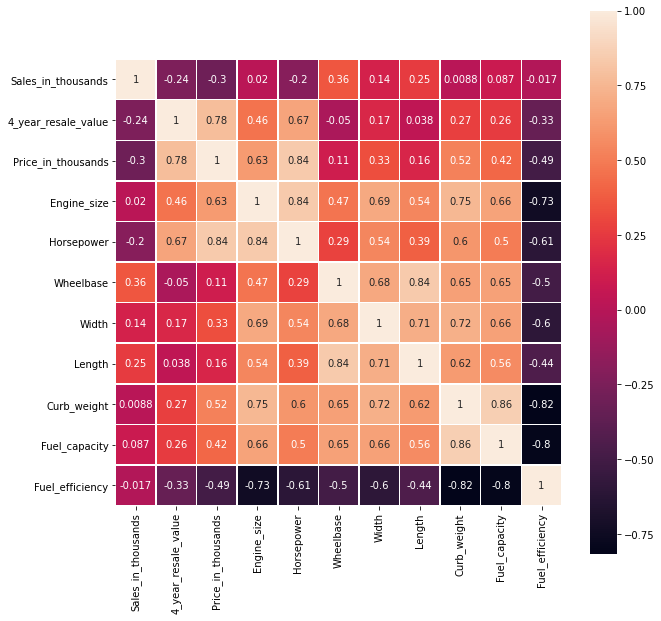

In [10]:
from sklearn.preprocessing import StandardScaler

# Nos quedamos con dos muestras de car / 
df_test = coche.iloc[[0,84]].copy()
df_train = coche.drop([0, 84],axis=0).copy()

scaler = StandardScaler()
coche_norm = scaler.fit_transform(df_train[['4_year_resale_value','Price_in_thousands','Engine_size','Horsepower','Wheelbase','Width','Length','Curb_weight','Fuel_capacity','Fuel_efficiency']])
coche_norm
plt.rcParams['figure.figsize'] = (10.0,10.0)
sns.heatmap(coche.corr(),square=True,annot=True,linewidths=.5)

#### Vamos a guardar la información de 2 observaciones, una de cada tipo de coche para luego comprobar en que grupo quedarían localizadas (por ejemplo la primera observación y la 84)

#### Ahora sí, vamos a crear el dataset con las variables a las que les vamos a realizar el PCA

In [11]:
cochepca= coche[['4_year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower','Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity','Fuel_efficiency']]

## Comenzamos con el método PCA

### En primer lugar, seleccionando las componentes por el método del codo

La idea es buscar un codo en el gráfico entre las componentes y la varianza explicada, es decir, un punto a partir del cual el incremento de información explicada es casi la misma. El criterio es quedarse con un número de componentes que excluya los asociados a valores pequeños y aproximadamente del mismo tamaño.


In [12]:
#Recuerda si no lo has hecho antes que vamos a tener que normalizar las variables
coche_norm

array([[ 0.26463792,  0.07404174,  0.12913985, ...,  0.22950171,
        -0.19207629,  0.27086711],
       [ 0.10303059, -0.31756862,  0.12913985, ...,  0.15356058,
        -0.19207629,  0.50806713],
       [ 1.22938469,  1.02492566,  0.41784191, ...,  0.76755271,
         0.0164829 , -0.44073293],
       ...,
       [-0.29315221,  0.10200891, -0.64073232, ..., -0.18736663,
        -0.009587  ,  0.27086711],
       [-0.29315221,  1.26963843, -0.73696634, ...,  0.36522629,
         0.1468324 , -0.20353291],
       [-0.29315221,  0.60541805, -0.15956222, ...,  0.36361052,
         0.82464977,  0.0336671 ]])

### Aplicamos PCA con 10 componentes inicialmente

y luego seleccionamos las mínimas necesarias. Primero aplicamos PCA:

In [13]:
pca=PCA(n_components=10)
principalComponents = pca.fit(coche_norm)
var_explicada = pca.explained_variance_ratio_
print(var_explicada)


[0.59786645 0.20235529 0.06518317 0.04017785 0.02608444 0.02243435
 0.01550099 0.01396084 0.01035142 0.0060852 ]


y a continuación revisamos la varianza explicada, para ello dibujamos una gráfica entre componentes y varianza acumulada

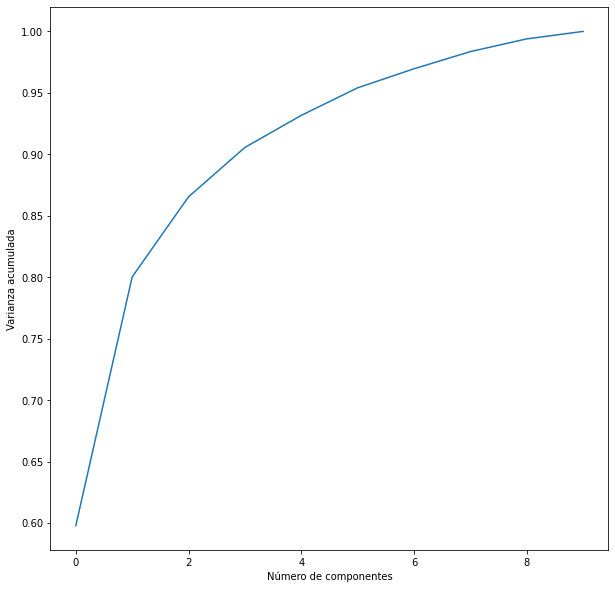

In [14]:
plt.plot(np.cumsum(var_explicada)) 
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada');

##### ¿Con cuantas componentes superamos el 85%?  ¿ y esas componentes cuánto aportan realmente?

3

##### Aplicamos el PCA con el número de componentes que nos ha parecido razonable y graficamos si es posible

[0.59786645 0.20235529 0.06518317]
Suma Total:  0.8654049080234525


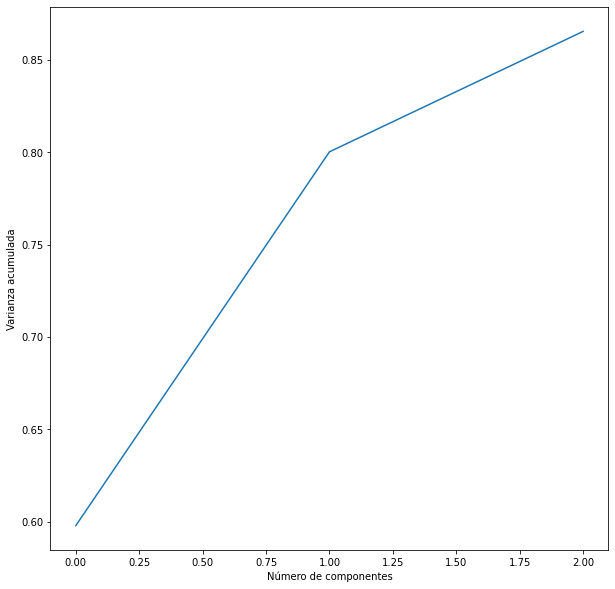

In [15]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
principalComponents = pca.fit(coche_norm)
var_explicada = pca.explained_variance_ratio_
print(var_explicada)
plt.plot(np.cumsum(var_explicada)) 
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada');

print ("Suma Total: ",var_explicada[0] + var_explicada [1] + var_explicada[2])

##### Y como podemos observar hemos podido disminuir las dimensiones de 10 variables inicialmente a solo algunas componentes

####  Para realizar la gráfica y aunque PCA se usa en no supervisada (es decir sin etiquetas), para verlo mejor vamos a dibujar los coches diferenciándolos entre 'Passenger' y 'Car' tal y como vienen en 'Vehicles_types'

In [16]:
# Guardamos el nuevo dataset con los dos componentes
transformada=pca.transform(coche_norm)
transformada.shape

(155, 3)

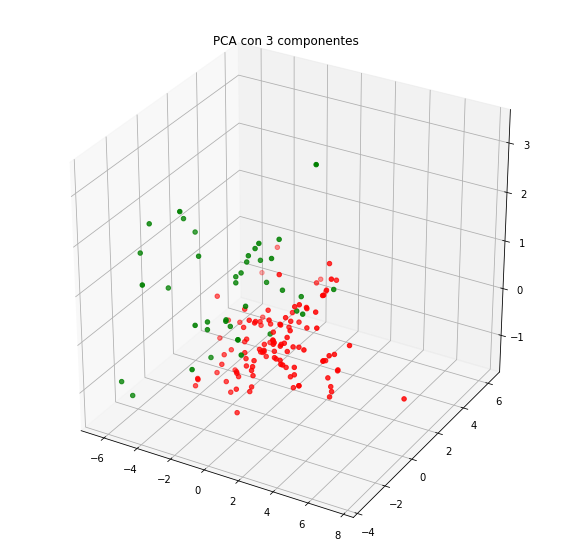

In [17]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

# Creamos la figura
fig = plt.figure(figsize=(10, 10))
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')

# Definimos los datos de la prueba y su color
color=df_train['Vehicle_type'].map({'Passenger': 'r', 'Car': 'g'}).to_list()

x = transformada[:,0]
y = transformada[:,1]
z = transformada[:,2]
#
## Agregamos los puntos
ax1.scatter(x, y, z, c=color, marker='o')
ax1.set_title('PCA con 3 componentes')
## Mostramos el gráfico
plt.show()


### ¿Consigues ver los grupos separados en la gráfica?

Mas o menos si

## Predeterminando la cantidad de información de las componentes

####  En segundo lugar, seleccionando las componentes que me aportan el 80% de la información

In [18]:
pca=PCA(n_components=0.8)
principalComponents = pca.fit(coche_norm)
var_explicada = pca.explained_variance_ratio_
print(var_explicada)
print ("Suma Total: ",var_explicada[0] + var_explicada [1])

[0.59786645 0.20235529]
Suma Total:  0.8002217412941708


#### ¿Cuantas componentes principales obtenemos en este caso? ¿Cuanta varianza acumulada proporcionan? Grafica los resultados

2  0.8002217412941708

##### Podemos comprobar que en efecto su porcentaje supera el 80%

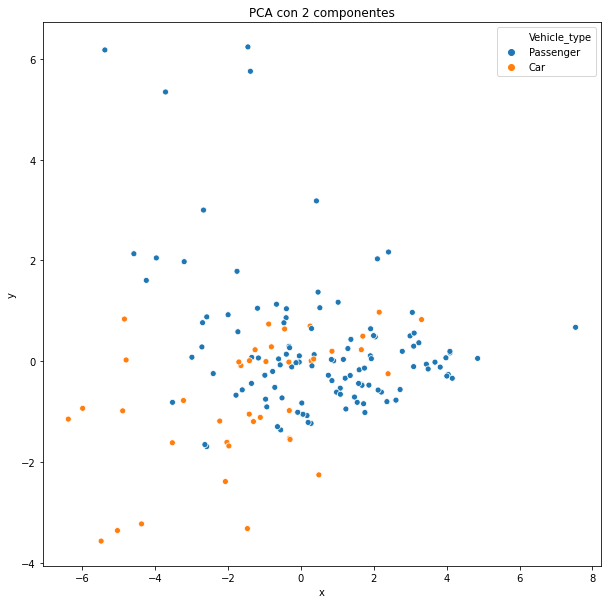

In [19]:
# Guardamos el nuevo dataset con los dos componentes
transformada=pca.transform(coche_norm)
df_transformada_2d = pd.DataFrame(transformada, columns=['x','y'])
df_transformada_2d['Vehicle_type']=df_train['Vehicle_type'].to_list()

plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="x", y="y", hue="Vehicle_type", data=df_transformada_2d)#
ax.set_title('PCA con 2 componentes');

#### ¿Es posible con esta gráfica hacer una gran distinción entre car y passenger?

## ¿Distinguimos el grupo de las dos observaciones test?

#### Para ello accedemos a la página de scikit.sklearn para ver como estandariza StandardScaler y nos fijamos que la forma de estandarizar es: 
###### z = (x - u) / s siendo u la media y s la desv.tipica.

In [20]:
df_test_norm_filter = df_test[['4_year_resale_value','Price_in_thousands','Engine_size','Horsepower','Wheelbase','Width','Length','Curb_weight','Fuel_capacity','Fuel_efficiency']]

media = cochepca.mean()
desv_std = cochepca.std()

df_test_obs =(df_test_norm_filter - media )/desv_std
df_test_obs


,4_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency
0,-0.080593,-0.408745,-1.210503,-0.811978,-0.825021,-1.117710,-1.116398,-1.178953,-1.224781,0.979131
84,0.191057,0.313605,0.422055,0.249549,-0.024167,-0.362143,-0.055803,1.823633,1.639067,-1.378592


#### De esta manera hemos estandarizado los datos al igual que si hubiesen estado en el dataset original

In [21]:
# Creamos un DF con las variables guradadas de cara a plotear mas tarde el dataset sin esos puntos y esos dos puntos
t_2d_test=pca.transform(df_test_obs)
#t_2d_test
t_2d_test = pd.DataFrame(t_2d_test, columns=['x','y'])
t_2d_test['Vehicle_type'] = df_test['Vehicle_type'].to_list()
t_2d_test

,x,y,Vehicle_type
0,2.957495,0.641367,Passenger
1,-1.937563,0.073328,Car


#### Ahora ya le hemos aplicado las PCA a ambas pruebas y proseguimos con la gráfica

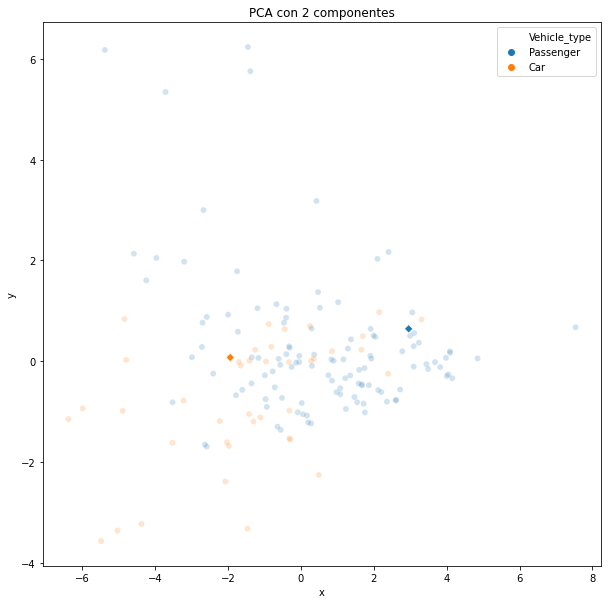

In [22]:
plt.figure(figsize=(10,10))
# Dataset sin los dos puntos 
ax = sns.scatterplot(x="x", y="y", hue="Vehicle_type", data=df_transformada_2d, alpha=0.2)
# Dataset que contienes solo los dos puntos guardados al principio
ax.set_title('PCA con 2 componentes');
sns.scatterplot(x="x", y="y", hue="Vehicle_type", data=t_2d_test, marker='D', ax=ax, legend=False)

#### ¿Podríamos clasificar a nuestras 2 observaciones de test entre los 2 tipos de vehículos?

## ¿Qué relación tienen las componentes con las variables?

#### Utiliza un indicador que nos permita identificar las relaciones entre variables y componentes

In [23]:
pca.components_[0]

array([-0.19298559, -0.27118461, -0.36402562, -0.32928464, -0.28004568,
       -0.33181943, -0.28643015, -0.37220014, -0.34764118,  0.34396681])

#### ¿Puedes visualizar estas relaciones en una gráfica?

In [24]:
pca.components_[1]

array([ 5.32487531e-01,  4.66228913e-01,  1.07158957e-01,  3.27242045e-01,
       -4.23201234e-01, -2.09936393e-01, -3.58775817e-01, -1.02044596e-01,
       -1.34949395e-01,  3.63610564e-04])

#### ¿Qué variables aportan mas a cada componente?

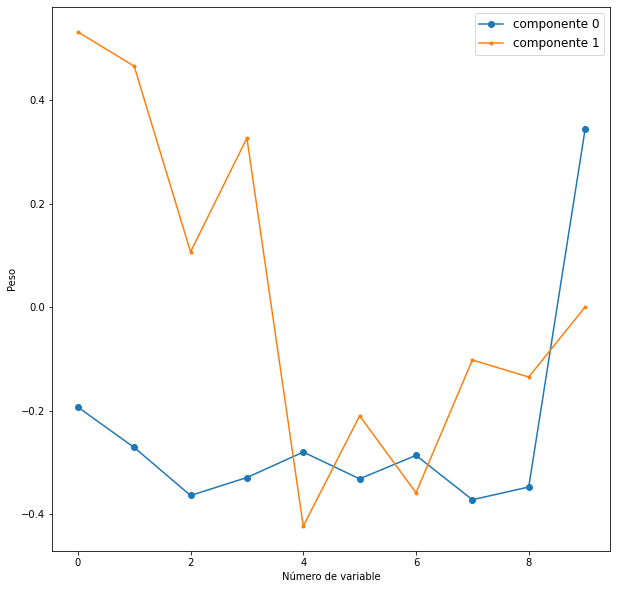

In [25]:
plt.plot(range(0, len(pca.components_[0])), pca.components_[0], marker='o', label='componente 0')
plt.plot(range(0, len(pca.components_[1])), pca.components_[1], marker='.', label='componente 1')
plt.xlabel('Número de variable')
plt.ylabel('Peso')
plt.legend(prop=dict(size=12))
plt.show()

In [29]:
# Para la componente 1 : las variable 0 1 y 4
# Para la compomente 0 : las variables 2 7 y 9
print ( "Componenete 1 : ", cochepca.columns[0],cochepca.columns[1],cochepca.columns[4])
print ("Componenete 0 : ", cochepca.columns[2],cochepca.columns[7],cochepca.columns[9])

Componenete 1 :  4_year_resale_value Price_in_thousands Wheelbase
Componenete 0 :  Engine_size Curb_weight Fuel_efficiency


## Como conclusiones y reflexiones:
* ¿Se te ocurren aplicaciones concretas de PCA en tu entorno?
* ¿En qué situaciones deberíamos ser cuidadosos antes de aplicar PCA?

In [27]:
# En el entorno de redes de comunicaciones donde recopilamos muchas variables de muchos equipos (para el proyecto tenemos 92 variables), seria
# interesante reducir la dimensionalidad de cara a crear modelos.

# Hay que tener los datos normalizados y tratar los valores missing con alguna estrategia ,elegir de manera cuidadosa los componentes con los que nos vamos a quedar.